<a href="https://colab.research.google.com/github/durgesh2010/retail-app-datanalysis/blob/main/Plantix_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analyst for Retailer App Case Study**



Our  Plantix  Partner  app  allows  Retailers  to  order  supplies  online.  We  are  continuously
working on optimizing the app.
1. Which KPIs would you use to measure the performance of our app?
2. Prepare a report regarding our growth between the 2 years. Please try to answer the
following questions:

                    a. Did our business grow?
                    b. Does our app perform better now?
                    c. Did our user base grow?

3. What are our top-selling products in each of the two years? Can you draw some insight
from this?
4. Looking at July 2021 data, what do you think is our biggest problem and how would you
recommend fxing it?
5. Does the login frequency afect the number of orders made?




Feel free to use SQL, Python or R to tackle this problem. Excel fles will not be considered.
Try to spend no more than 2 hours on this case study. You can share your insights in a short
Document or a very short presentation. Please attach any SQL, Python or R code you have
used, along with your answers.




You  will  fnd  3  tables  attached.  The  login_logs  table  contains  information  about  users
logging  in.  The  sales  orders  table  contains  information  about  orders  made  and  the
sales_orders_items contains the specifcs of each order. You have been provided with data
for July 2021 and July 2022.


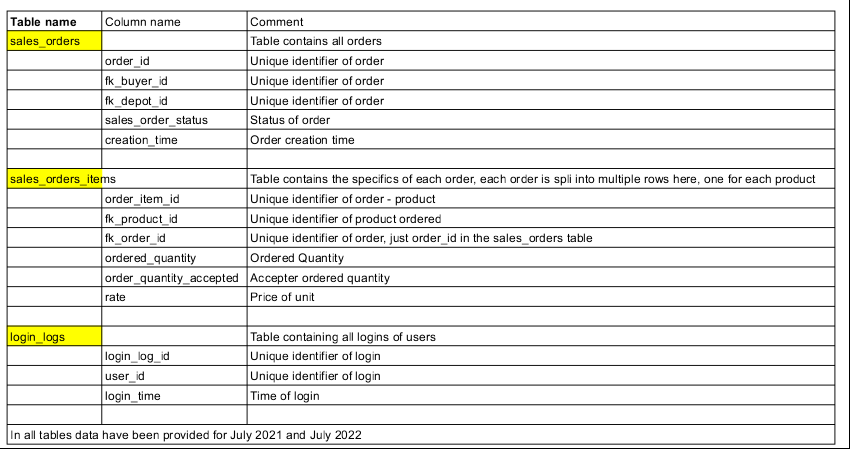

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#directory path
login_log = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone project samples/Plantix Assignment/Plantix assignment/login_logs.csv')


In [ ]:
#directory path
sales_order = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone project samples/Plantix Assignment/Plantix assignment/sales_orders.csv')


In [ ]:
#directory path
sales_orders_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone project samples/Plantix Assignment/Plantix assignment/sales_orders_items.csv')


In [ ]:
sales_order.head(2)

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0


In [ ]:
sales_orders_items.head(2)

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
0,62609,7818,119874,1,0,4993.0
1,62610,7607,119877,1,0,6203.4


Making a copy of data sets 

In [ ]:
login = login_log.copy()
sales = sales_order.copy()
sales_items = sales_orders_items.copy()

# Checking the data sets

In [ ]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666357 entries, 0 to 666356
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   login_log_id  666357 non-null  int64 
 1   user_id       666357 non-null  int64 
 2   login_time    666357 non-null  object
dtypes: int64(2), object(1)
memory usage: 15.3+ MB


In [ ]:
#checking info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            13630 non-null  int64 
 1   fk_buyer_id         13630 non-null  int64 
 2   fk_depot_id         13630 non-null  int64 
 3   sales_order_status  13630 non-null  object
 4   creation_time       13630 non-null  object
dtypes: int64(3), object(2)
memory usage: 532.5+ KB


In [ ]:
sales_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20488 entries, 0 to 20487
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_item_id            20488 non-null  int64  
 1   fk_product_id            20488 non-null  int64  
 2   fk_order_id              20488 non-null  int64  
 3   ordered_quantity         20488 non-null  int64  
 4   order_quantity_accepted  20488 non-null  int64  
 5   rate                     20488 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 960.5 KB


# Fortunately all three data sets are free from null values that will provide us accuracy in results.

In [ ]:
#Statistical summary
sales_items.describe()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate
count,20488.000000,20488.000000,20488.000000,20488.000000,20488.000000,20488.000000
mean,111618.299688,8685.166878,222065.659850,3.252538,1.453827,6322.258606
std,42437.427111,3478.256921,89401.468387,14.690323,6.486877,5470.559975
min,62609.000000,335.000000,119874.000000,1.000000,0.000000,1.000000
25%,67730.750000,7860.000000,129564.000000,1.000000,0.000000,3041.750000
50%,147344.500000,8773.500000,297574.500000,1.000000,0.000000,4894.000000
75%,152466.250000,11131.000000,308100.000000,2.000000,1.000000,7924.000000
max,157588.000000,14469.000000,318972.000000,999.000000,500.000000,162500.000000


In [149]:
login.describe()

,login_log_id,user_id
count,6.663570e+05,666357.000000
mean,3.271343e+06,111582.011252
std,1.453791e+06,63061.193491
min,1.385328e+06,972.000000
25%,1.551917e+06,59852.000000
50%,4.337335e+06,96976.000000
75%,4.503924e+06,166324.000000
max,4.670513e+06,225716.000000


In [150]:
sales.describe()

,order_id,fk_buyer_id,fk_depot_id
count,13630.000000,13630.000000,13630.000000
mean,226375.926559,101658.050770,4.725459
std,89185.597078,60965.161791,3.385547
min,119874.000000,996.000000,1.000000
25%,130095.750000,53976.000000,1.000000
50%,298528.500000,87884.000000,4.000000
75%,308750.250000,143200.000000,8.000000
max,318972.000000,225684.000000,12.000000


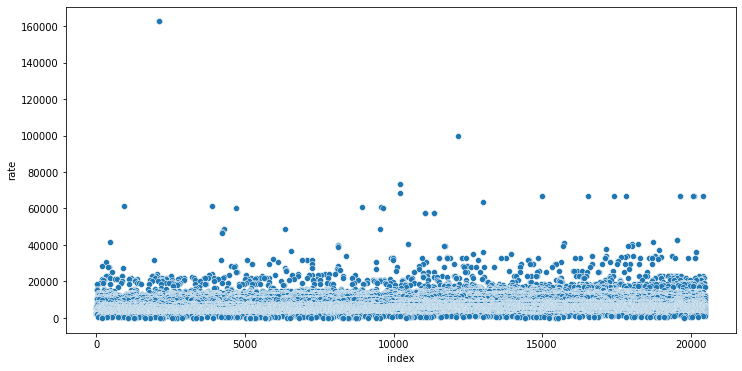

In [ ]:
# let's see about rate per unit
rate_per_unit = sales_items['rate'].reset_index().sort_values(by='rate',ascending=False).set_index('index')
#changing size of scatter plot
fig = plt.gcf()
fig.set_size_inches(12, 6)
# plotting scatter plot 
sns.scatterplot(data=rate_per_unit,x='index',y='rate')

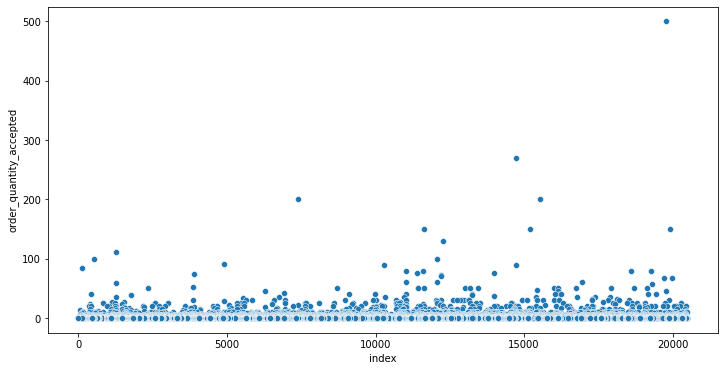

In [ ]:
# let's see our accepted quantities
accepted_quantities = sales_items['order_quantity_accepted'].reset_index().sort_values(by='order_quantity_accepted',ascending=False).set_index('index')
#changing size of scatter plot
fig = plt.gcf()
fig.set_size_inches(12, 6)
# plotting scatter plot 
sns.scatterplot(data=accepted_quantities,x='index',y='order_quantity_accepted')

In [ ]:
# data is looking almost fine

# Q.2(a) Did our business grow?

In [51]:
# creating a separate year column 
login['login_year']=login['login_time'].apply(lambda x : x[0:4])
sales['creation_year']=sales['creation_time'].apply(lambda x : x[0:4])

# creating a separate date column 
login['date']=login['login_time'].apply(lambda x : x[0:11])
sales['date']=sales['creation_time'].apply(lambda x : x[0:11])



In [76]:
# login in year 2021
login_2021 = login[login['login_year'] == '2021']
#login_2021['login_year'].value_counts()

# login in year 2022
login_2022 = login[login['login_year'] == '2022']
#login_2022['login_year'].value_counts()

In [144]:
login_2022.head(3)

,login_log_id,user_id,login_time,login_year,date
271240,4275397,115652,2022-07-01 00:12:45.0,2022,2022-07-01
271241,4275398,146672,2022-07-01 00:16:51.0,2022,2022-07-01
271242,4275399,22604,2022-07-01 00:18:55.0,2022,2022-07-01


In [109]:
sales.head()

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,creation_year,date
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0,2021,2021-07-01
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0,2021,2021-07-01
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0,2021,2021-07-01
3,119883,97616,4,Rejected,2021-07-01 02:56:00.0,2021,2021-07-01
4,119886,12440,1,Rejected,2021-07-01 03:11:31.0,2021,2021-07-01


In [55]:
#creating a revenue column
sales_items['revenue'] = sales_items['order_quantity_accepted'] * sales_items['rate']
#combined year revenue
sales_items['revenue'].sum()

177174149.409

In [110]:
# Merging the two dataframes using inner join
sales_and_sales_items  = pd.merge(sales, sales_items, how='inner',left_on='order_id',right_on='fk_order_id') 
sales_and_sales_items.head(3)

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,creation_year,date,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,revenue
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0,2021,2021-07-01,62609,7818,119874,1,0,4993.00,0.00
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0,2021,2021-07-01,62610,7607,119877,1,0,6203.40,0.00
2,119880,41728,8,Shipped,2021-07-01 02:42:12.0,2021,2021-07-01,62611,9916,119880,2,2,2904.41,5808.82


In [57]:
sales_and_sales_items_2021 = sales_and_sales_items[sales_and_sales_items['creation_year'] == '2021']
sales_and_sales_items_2022 = sales_and_sales_items[sales_and_sales_items['creation_year'] == '2022']
#sales_and_sales_items_2022

# Revenue in 2021

In [ ]:
# Total Revenue in 2021 in round figure with only shipped and accepted quantity orders
shipped_and_accepted_orders_2021 = sales_and_sales_items_2021[(sales_and_sales_items_2021['order_quantity_accepted'] != 0) & (sales_and_sales_items_2021['sales_order_status'] == 'Shipped')] 
revenue_of_only_accepted_orders_2021 = round(shipped_and_accepted_orders_2021['revenue'].sum())
revenue_of_only_accepted_orders_2021


60136715

In [ ]:
# Total Revenue in 2021 in round figure "including" pending and reviewed products
sales_and_sales_items_2021_revenue = sales_and_sales_items[sales_and_sales_items['creation_year'] == '2021']['revenue']
revenue_including_pending_and_reviewed_2021 = round(sales_and_sales_items_2021_revenue.sum())
revenue_including_pending_and_reviewed_2021

60315971

# Revenue in 2021

In [ ]:
# Total Revenue in 2022 in round figure with only shipped and accepted quantity orders
shipped_and_accepted_orders_2022 = sales_and_sales_items_2022[(sales_and_sales_items_2022['order_quantity_accepted'] != 0) & (sales_and_sales_items_2022['sales_order_status'] == 'Shipped')] 
revenue_of_only_accepted_orders_2022 = round(shipped_and_accepted_orders_2022['revenue'].sum())
revenue_of_only_accepted_orders_2022

115089176

In [ ]:
# Total Revenue in 2022 in round figure including pending and reviewed products
sales_and_sales_items_2022_revenue = sales_and_sales_items[sales_and_sales_items['creation_year'] == '2022']['revenue']
revenue_including_pending_and_reviewed_2022 = round(sales_and_sales_items_2022_revenue.sum())
revenue_including_pending_and_reviewed_2022

116858178

# We can see revenues that reflects our business has beeen growing up.

# Q.2(b) Does our app perform better now?)

In [58]:
# Total orders in 2021
sales_and_sales_items_2021['order_id'].count()

9826

In [59]:
# # unique orders in 2021
sales_and_sales_items_2021['order_id'].nunique()

6216

In [60]:
# Total orders in 2022
sales_and_sales_items_2022['order_id'].count()

10662

In [ ]:
# unique orders in 2022
sales_and_sales_items_2022['order_id'].nunique()

7414

In [63]:
# login count in 2021
login_2021['login_log_id'].count()

271240

In [62]:
# login count in 2022
login_2022['login_log_id'].count()

395117

# Above results indicating that our app is logged in more in 2022, So we can consider our app is performing well and loved by users.

# Q.2(c) Did our user base grow?

In [81]:
# User_id in 2021 
login_2021['user_id'].nunique()

10867

In [82]:
# User_id in 2022 
login_2022['user_id'].nunique()

13022

In [ ]:
# More than 2000 plus unique user id's we have in 2022 as compare to 2021 So yes user base is also increased

# Number of user_id's is more in 2022, So yes user base is also increased

# 3. What are our top-selling products in each of the two years? Can you draw some insight from this?

In [92]:
# Top five seliing products in 2021 excuding pending and reviewed products(only accepted orders)
shipped_and_accepted_orders_2021 = sales_and_sales_items_2021[(sales_and_sales_items_2021['order_quantity_accepted'] != 0) & (sales_and_sales_items_2021['sales_order_status'] == 'Shipped')] 
products_excluding_pending_and_reviewed_2021 = shipped_and_accepted_orders_2021['fk_product_id'].value_counts().head(5).reset_index()#.to_frame()
products_excluding_pending_and_reviewed_2021.rename(columns={'fk_product_id':'count','index':'fk_product_id'},inplace= True)
products_excluding_pending_and_reviewed_2021

,fk_product_id,count
0,10235,280
1,1548,146
2,8219,133
3,9925,123
4,8444,114


In [93]:
# Top five orderd products in 2021
product_ordered_in_2021 = sales_and_sales_items_2021['fk_product_id'].value_counts().head(5).reset_index()
product_ordered_in_2021.rename(columns={'fk_product_id':'count','index':'fk_product_id'},inplace= True)
product_ordered_in_2021

,fk_product_id,count
0,10235,550
1,8444,337
2,1548,300
3,1041,268
4,9925,249


In [94]:
# Top five seliing products in 2022 excuding pending and reviewed products(only accepted orders)
shipped_and_accepted_orders_2022 = sales_and_sales_items_2022[(sales_and_sales_items_2022['order_quantity_accepted'] != 0) & (sales_and_sales_items_2022['sales_order_status'] == 'Shipped')] 
products_excluding_pending_and_reviewed_2022 = shipped_and_accepted_orders_2022['fk_product_id'].value_counts().head(5).reset_index()#.to_frame()
products_excluding_pending_and_reviewed_2022.rename(columns={'fk_product_id':'count','index':'fk_product_id'},inplace= True)
products_excluding_pending_and_reviewed_2022

,fk_product_id,count
0,8444,233
1,3610,198
2,10235,184
3,8425,153
4,1041,142


In [95]:
# Top five orderd products in 2022 
product_ordered_in_2022 = sales_and_sales_items_2022['fk_product_id'].value_counts().head(5).reset_index()
product_ordered_in_2022.rename(columns={'fk_product_id':'count','index':'fk_product_id'},inplace= True)
product_ordered_in_2022

,fk_product_id,count
0,8444,485
1,10235,358
2,1041,356
3,8425,345
4,3610,335


# Now let's see the type of orders that shipped but not accepted

In [ ]:
# Orders that shipped but not accepted in 2022
shipped_and_not_accepted_orders_2022 = sales_and_sales_items_2022[(sales_and_sales_items_2022['order_quantity_accepted'] == 0) & (sales_and_sales_items_2022['sales_order_status'] == 'Shipped')] 
shipped_and_not_accepted_orders_2022['order_id'].count()

173

In [ ]:
# Orders that shipped but not accepted in 2021
shipped_and_not_accepted_orders_2021 = sales_and_sales_items_2021[(sales_and_sales_items_2021['order_quantity_accepted'] == 0) & (sales_and_sales_items_2021['sales_order_status'] == 'Shipped')] 
shipped_and_not_accepted_orders_2021['order_id'].count()

322

The numbers are more in 2021 that shipped but not accepted we have to figure out why is it so?

# 4. Looking at July 2021 data, what do you think is our biggest problem and how would you recommend fxing it?


Hypothesis 1:-
Above results also indicates some reasons what went wrong in 2021 is the difference between number of orders booked and finally accepted orders

In [96]:
sales_and_sales_items_2021['fk_buyer_id'].value_counts().head(15)

97116     67
41840     44
100036    42
79652     39
87136     38
35700     38
23188     36
42120     35
43844     35
90308     33
75252     31
81860     30
85584     29
84612     29
41192     29
Name: fk_buyer_id, dtype: int64

In [ ]:
# as we can see not a single top buyer is repeating in 2022 of 2021 i.e we lost our top customers we need to figure out what was the rsn

In [ ]:
sales_and_sales_items_2022['fk_buyer_id'].value_counts().head(15)

79652     60
130984    43
77488     35
223112    30
190076    29
152544    27
180840    26
202168    25
28464     25
147592    24
180256    24
125236    23
218752    23
95388     23
205484    22
Name: fk_buyer_id, dtype: int64

#Hypothesis - 2 :- Top buyers of 2021 lost in 2022

# 5. Does the login frequency affect the number of orders made?

In [105]:
#users in 2021
login_2021['user_id'].count()

271240

In [104]:
# unique users in 2021
login_2021['user_id'].nunique()

10867

In [102]:
#users in 2021
login_2022['user_id'].count()

395117

In [103]:
# unique users in 2021
login_2022['user_id'].nunique()

13022

checking count of fk_buyer_id in user_id

In [ ]:
er = list(sales['fk_buyer_id'])
er

In [ ]:
buyer_lst = list(sales['fk_buyer_id'])
buyer_lst

In [ ]:
sales[sales['fk_buyer_id'] 

In [ ]:
elist = []
for i in er:
  x = buyer_lst.count(i)
  elist.append(x)
elist#.count(0)  

# No common column in between login table and sales table but  Hypothetically considering fk_buyer_id and user_id is same after checking number of counts of buyer_id's in user_id.

In [151]:
# merging the tables 
login_and_sales = pd.merge(login, sales, how='inner',left_on='user_id',right_on='fk_buyer_id') 
login_and_sales.head(3)

,login_log_id,user_id,login_time,login_year,date_x,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,creation_year,date_y
0,1385328,99160,2021-07-01 00:00:33.0,2021,2021-07-01,126408,99160,9,Shipped,2021-07-11 22:59:43.0,2021,2021-07-11
1,1385328,99160,2021-07-01 00:00:33.0,2021,2021-07-01,138030,99160,9,Rejected,2021-07-30 07:43:51.0,2021,2021-07-30
2,1385328,99160,2021-07-01 00:00:33.0,2021,2021-07-01,138039,99160,9,Rejected,2021-07-30 07:47:29.0,2021,2021-07-30


In [173]:
frequent_users = login_and_sales.groupby('order_id')['user_id'].count()
repeated_users   = frequent_users.reset_index().sort_values(by = 'user_id',ascending = False) 
repeated_users

,order_id,user_id
2451,127227,3868
1415,124119,3868
10569,309792,2471
9450,306435,2471
10570,309795,2471
...,...,...
6998,299079,1
6175,138399,1
5140,135294,1
6461,297468,1


In [172]:
repeated_users[repeated_users['user_id'] > 1]

,order_id,user_id
2451,127227,3868
1415,124119,3868
10569,309792,2471
9450,306435,2471
10570,309795,2471
...,...,...
8758,304359,2
4777,134205,2
162,120360,2
3019,128931,2


# Yes, the login frequency affect the number of orders made because most of the orders made by the old users that logged multiple times as we can see above very less unique user id's compare to  total user id logged in.